# EDA

In [52]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings("ignore")
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (19, 5)

In [28]:
df = pd.read_csv('new.csv', index_col=0)

In [29]:
to_datetime = ['Order_Date', 'Ship_Date']
for col in to_datetime:
    df[col] = pd.to_datetime(df[col])

In [30]:
df.head()

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,City,State,Country,...,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Processing_Time_days,Returned,Income_Level,Gender
0,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,Oklahoma City,Oklahoma,United States,...,221.980,2,0.0,62.1544,40.77,High,2,0,High income,0
1,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,...,3709.395,9,0.1,-288.7650,923.63,Critical,2,0,High income,0
2,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,Brisbane,Queensland,Australia,...,5175.171,9,0.1,919.9710,915.49,Medium,1,0,High income,0
3,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,Berlin,Berlin,Germany,...,2892.510,5,0.1,-96.5400,910.16,Medium,2,0,High income,1
4,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,Dakar,Dakar,Senegal,...,2832.960,8,0.0,311.5200,903.04,Critical,1,0,Low income,0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51290 entries, 0 to 51289
Data columns (total 26 columns):
Order_ID                51290 non-null object
Order_Date              51290 non-null datetime64[ns]
Ship_Date               51290 non-null datetime64[ns]
Ship_Mode               51290 non-null object
Customer_ID             51290 non-null object
Customer_Name           51290 non-null object
Segment                 51290 non-null object
City                    51290 non-null object
State                   51290 non-null object
Country                 51290 non-null object
Region                  51290 non-null object
Market                  51290 non-null object
Product_ID              51290 non-null object
Category                51290 non-null object
Sub-Category            51290 non-null object
Product_Name            51290 non-null object
Sales                   51290 non-null float64
Quantity                51290 non-null int64
Discount                51290 non-null float64


In [32]:
df.describe()

,Sales,Quantity,Discount,Profit,Shipping_Cost,Processing_Time_days,Returned,Gender
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.610982,26.478567,3.969370,0.043283,0.358510
std,487.565361,2.278766,0.212280,174.340972,57.251373,1.729437,0.203496,0.479568
min,0.444000,1.000000,0.000000,-6599.978000,1.002000,0.000000,0.000000,0.000000
25%,30.758625,2.000000,0.000000,0.000000,2.610000,3.000000,0.000000,0.000000
50%,85.053000,3.000000,0.000000,9.240000,7.790000,4.000000,0.000000,0.000000
75%,251.053200,5.000000,0.200000,36.810000,24.450000,5.000000,0.000000,1.000000
max,22638.480000,14.000000,0.850000,8399.976000,933.570000,7.000000,1.000000,1.000000


## The number of orders by year

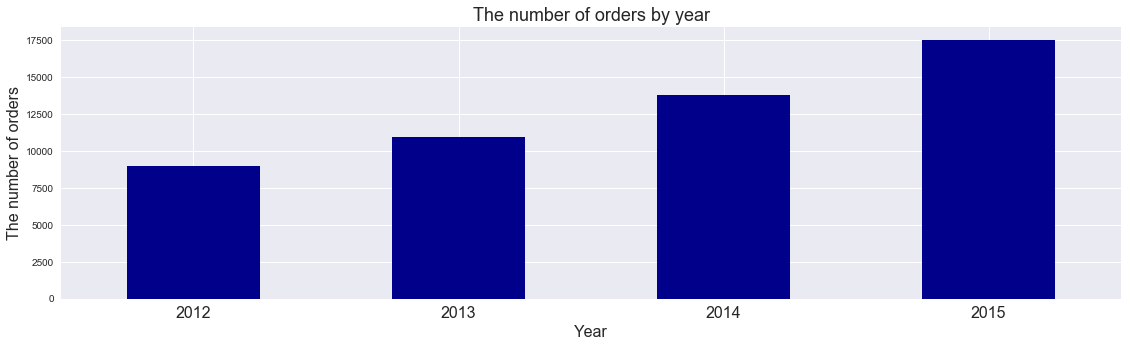

In [33]:
df['Order_Date'].dt.year.value_counts(sort = False).plot.bar(color='darkblue')
plt.xticks(fontsize=16, rotation=360)
plt.xlabel('Year', fontsize=16)
plt.ylabel('The number of orders', fontsize=16);
plt.title('The number of orders by year', fontsize=18);

As we can see from the bar chart above, the number of orders is increasing every year.

## Historical sales and profit plot

In [34]:
for_sales_plotting = df[['Order_Date', 'Sales']].set_index('Order_Date')
for_profit_plotting = df[['Order_Date', 'Profit']].set_index('Order_Date')

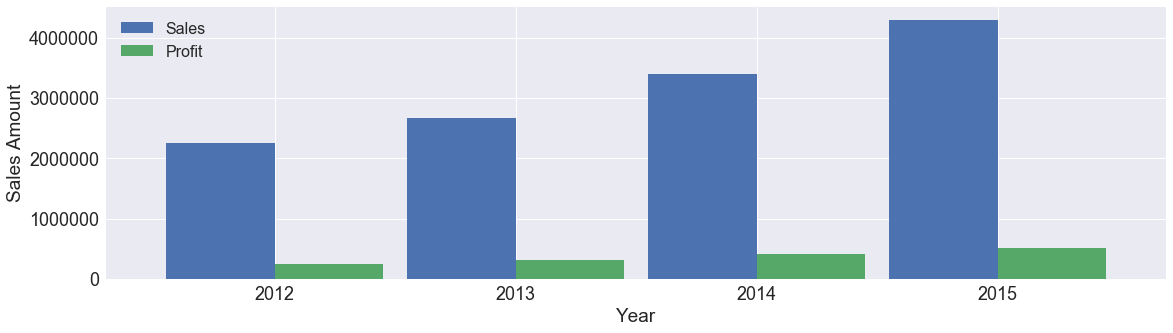

In [98]:
yearly_sales = for_sales_plotting.Sales.resample('A').sum()
sale_for_year = yearly_sales.groupby(yearly_sales.index.year).mean()
yearly_profit = for_profit_plotting.Profit.resample('A').sum()
profit_for_year = yearly_profit.groupby(yearly_profit.index.year).mean()

_ = pd.DataFrame(np.c_[sale_for_year, profit_for_year], index=np.arange(4))
_.plot.bar(width=0.9)
plt.xticks(np.arange(4), ('2012', '2013', '2014', '2015'), fontsize=18, rotation=0)
plt.yticks(fontsize=18)
plt.xlabel('Year', fontsize=19)
plt.ylabel('Sales Amount', fontsize=19)
gain = ['Sales', 'Profit']
plt.legend(gain, loc='upper left', fontsize=16);

## The number of orders by month

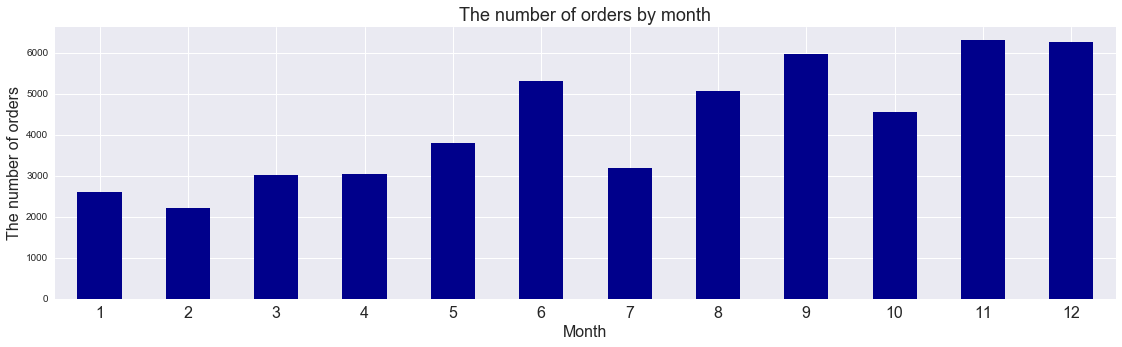

In [36]:
df['Order_Date'].dt.month.value_counts(sort = False).plot.bar(color='darkblue')
plt.xticks(fontsize=16, rotation=360)
plt.xlabel('Month', fontsize=16)
plt.ylabel('The number of orders', fontsize=16);
plt.title('The number of orders by month', fontsize=18);

## Historical average sales and profit for every month

In [61]:
for_sales_plotting = df[['Order_Date', 'Sales']].set_index('Order_Date')
for_profit_plotting = df[['Order_Date', 'Profit']].set_index('Order_Date')

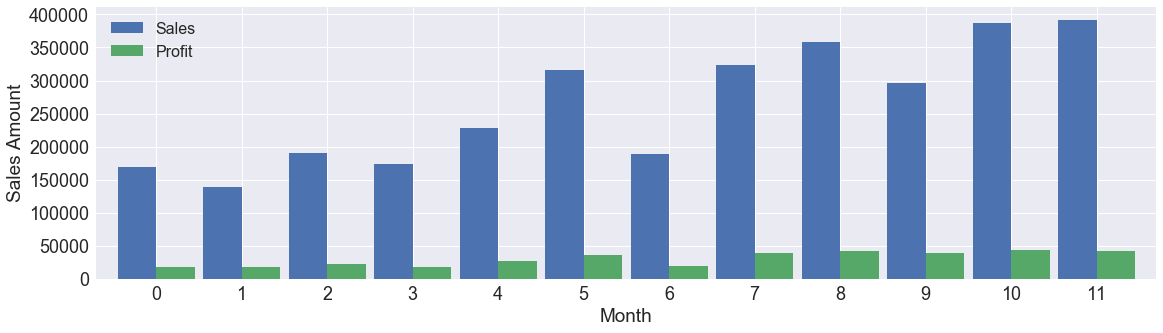

In [84]:
monthly_sales = for_sales_plotting.Sales.resample('M').sum()
sale_for_month = monthly_sales.groupby(monthly_sales.index.month).mean()

monthly_profit = for_profit_plotting.Profit.resample('M').sum()
profit_for_month = monthly_profit.groupby(monthly_profit.index.month).mean()

_ = pd.DataFrame(np.c_[sale_for_month, profit_for_month], index=np.arange(12))
_.plot.bar(width=0.9)
plt.xticks(fontsize=18, rotation=0)
plt.yticks(fontsize=18)
plt.xlabel('Month', fontsize=19)
plt.ylabel('Sales Amount', fontsize=19)
gain = ['Sales', 'Profit']
plt.legend(gain, loc='upper left', fontsize=16);

## Historical average sales by day of week

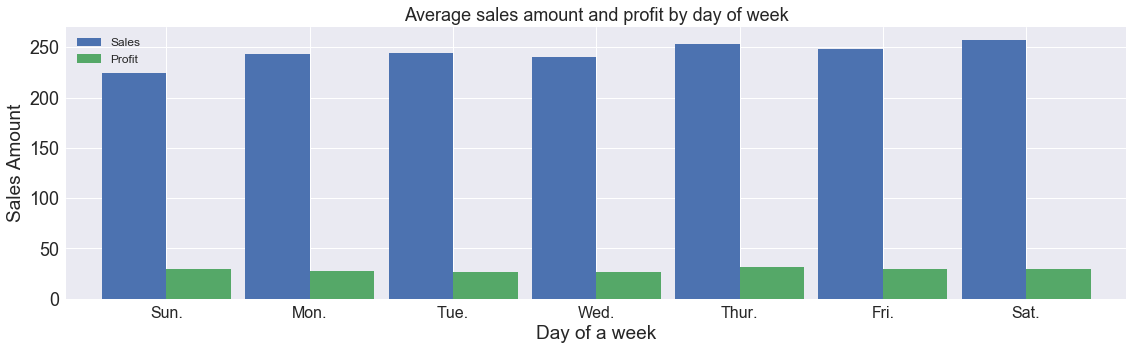

In [91]:
sale_for_week = for_sales_plotting.groupby(for_sales_plotting.index.dayofweek).mean()
profit_for_week = for_profit_plotting.groupby(for_profit_plotting.index.dayofweek).mean()

_ = pd.DataFrame(np.c_[sale_for_week, profit_for_week], index=np.arange(7))
_.plot.bar(width=0.9)
plt.xticks(np.arange(7), ('Sun.', 'Mon.', 'Tue.', 'Wed.', 'Thur.', 'Fri.', 'Sat.'), fontsize=16, rotation=0)
plt.yticks(fontsize=18)
plt.xlabel('Day of a week', fontsize=19)
plt.ylabel('Sales Amount', fontsize=19)
gain = ['Sales', 'Profit']
plt.legend(gain, loc='upper left', fontsize=12)
plt.title('Average sales amount and profit by day of week', fontsize=18);

## Sales by category

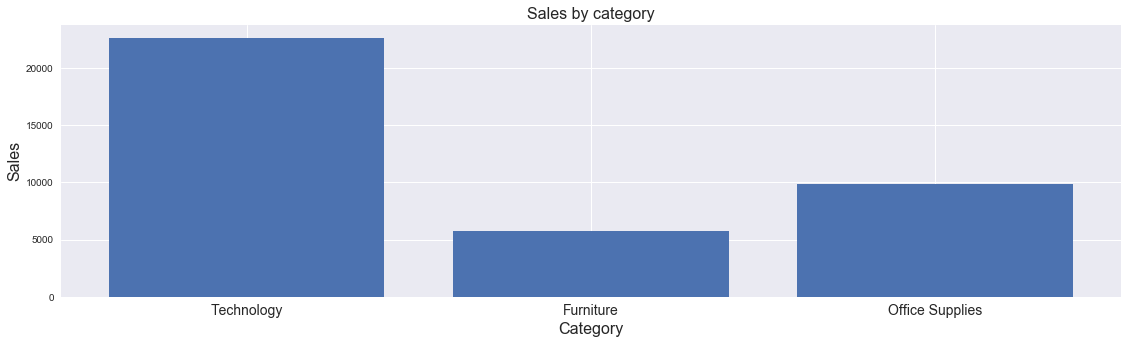

In [60]:
plt.bar(df.Category, df.Sales, align='center')
plt.xticks(fontsize=14)
plt.xlabel('Category', fontsize=16)
plt.ylabel('Sales', fontsize=16);
plt.title('Sales by category', fontsize=16);

## Sales by Sub-category

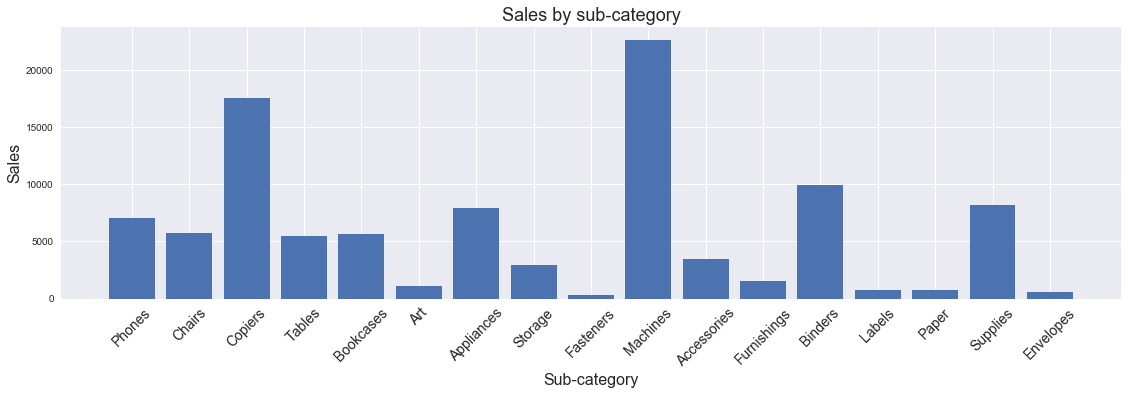

In [61]:
plt.bar(df['Sub-Category'], df['Sales'], align='center')
plt.xticks(fontsize=14, rotation=45)
plt.xlabel('Sub-category', fontsize=16)
plt.ylabel('Sales', fontsize=16);
plt.title('Sales by sub-category', fontsize=18);

## Sales by market

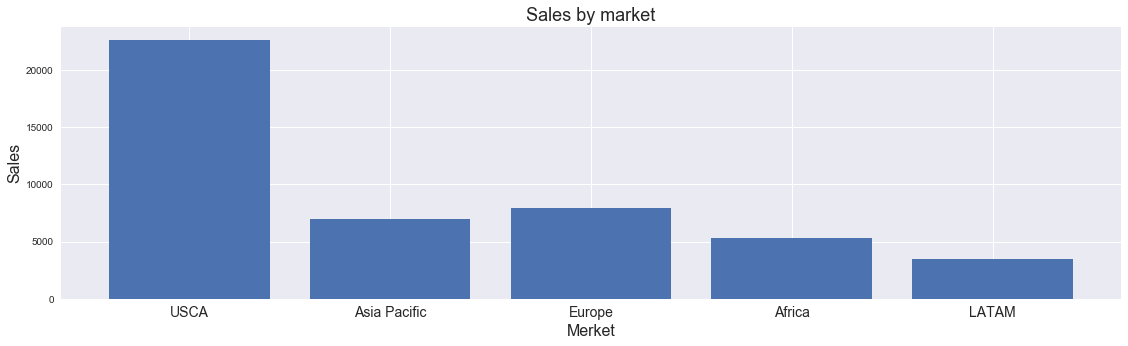

In [64]:
plt.bar(df['Market'], df['Sales'], align='center')
plt.xticks(fontsize=14)
plt.xlabel('Merket', fontsize=16)
plt.ylabel('Sales', fontsize=16);
plt.title('Sales by market', fontsize=18);

## Sales by segment

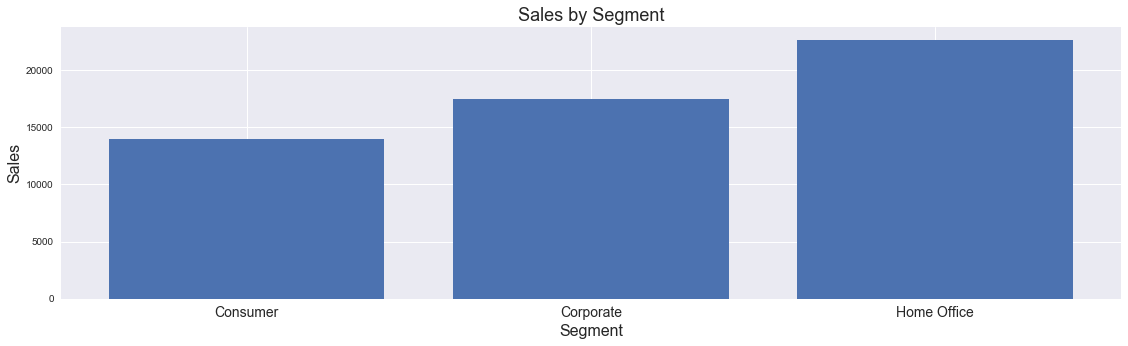

In [63]:
plt.bar(df['Segment'], df['Sales'], align='center')
plt.xticks(fontsize=14)
plt.xlabel('Segment', fontsize=16)
plt.ylabel('Sales', fontsize=16);
plt.title('Sales by Segment', fontsize=18);

## Check how many promotion was used

In [68]:
(df.Discount > 0.0).value_counts()

False    29009
True     22281
Name: Discount, dtype: int64

In [70]:
22281 / len(df) * 100

43.44121661142523

About 43% of prodcuts are purchased on discount.

## Check the outliners

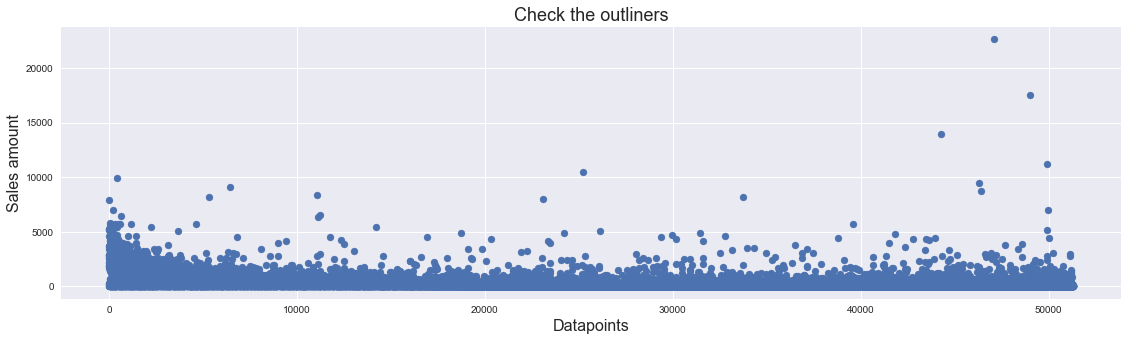

In [80]:
plt.scatter(range(df.Sales.shape[0]), df.Sales.values)
plt.xlabel('Datapoints', fontsize=16)
plt.ylabel('Sales amount', fontsize=16);
plt.title('Check the outliners', fontsize=18);

There are few outliners which have significant high sales amount. The outliners wil be take into consideration when other analyses are performed.

## Check the repeated customers

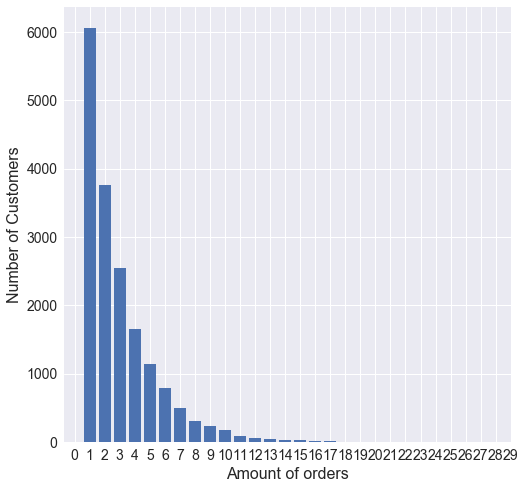

In [49]:
plt.rcParams['figure.figsize'] = (8, 8)
num_order_per_customer = df.groupby('Customer_ID')['Order_ID'].count().value_counts()

plt.bar(num_order_per_customer.index, num_order_per_customer)
plt.xticks(np.arange(30), fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Amount of orders', fontsize=16)
plt.ylabel('Number of Customers', fontsize=16)
plt.title('', fontsize=18);

Looks like most of the customers only made 1 or 2 orders from us